Loan Status Predective System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder 

In [2]:
loan_datasets=pd.read_csv('Loan_Datasets.csv')

In [3]:
loan_datasets.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_datasets.shape

(614, 13)

In [5]:
loan_datasets.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Dropping the missing value as there is categorical columns where we cant apply the imputation method

loan_datasets=loan_datasets.dropna()

In [7]:
loan_datasets.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loan_datasets.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [9]:
loan_datasets['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [10]:
encode=LabelEncoder()

In [11]:
target=encode.fit_transform(loan_datasets.Loan_Status)

In [12]:
print(target)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [13]:
loan_datasets=loan_datasets.drop(columns='Loan_Status', axis=1)

In [14]:
loan_datasets['loan_Status']=target

In [15]:
loan_datasets.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [16]:
loan_datasets['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

Here 3+ value can cause proble while trainig the model. So we have to Generalise it with 4

In [17]:
loan_datasets['Dependents'].replace(to_replace='3+', value=4, inplace=True)

C:\Users\Priyanshu tiwari\AppData\Local\Temp\ipykernel_35136\853722221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_datasets['Dependents'].replace(to_replace='3+', value=4, inplace=True)


In [18]:
loan_datasets['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

** Data Visualisation

<Axes: xlabel='Education', ylabel='count'>

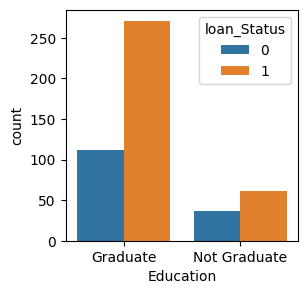

In [19]:
plt.figure(figsize=(3,3))
sns.countplot(x='Education', hue='loan_Status', data=loan_datasets)

<Axes: xlabel='Married', ylabel='count'>

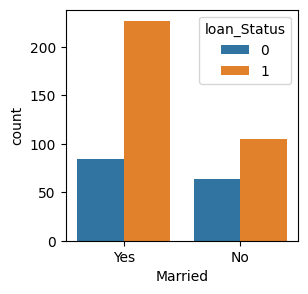

In [20]:
plt.figure(figsize=(3,3))
sns.countplot(x='Married', hue='loan_Status', data=loan_datasets)

<Axes: xlabel='Gender', ylabel='count'>

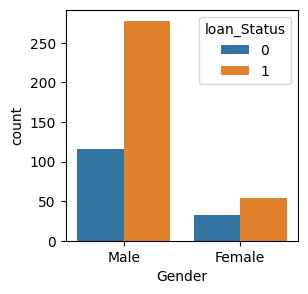

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(x='Gender', hue='loan_Status', data=loan_datasets)

<Axes: xlabel='Self_Employed', ylabel='count'>

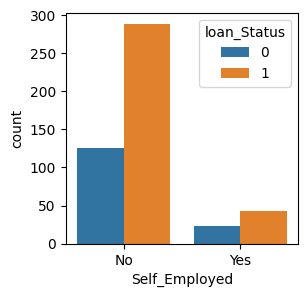

In [22]:
plt.figure(figsize=(3,3))
sns.countplot(x='Self_Employed', hue='loan_Status', data=loan_datasets)

In [23]:
loan_datasets['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [24]:
# Now we are changing all the categorial value into numerical value

loan_datasets.replace({'Married' : {'No': 0, 'Yes': 1}}, inplace=True)
loan_datasets.replace({'Gender' : {'Female': 0, 'Male': 1}}, inplace=True)
loan_datasets.replace({'Self_Employed' : {'No': 0, 'Yes': 1}}, inplace=True)
loan_datasets.replace({'Property_Area' : {'Rural': 0, 'Semiurban': 1, 'Urban': 2}}, inplace=True)
loan_datasets.replace({'Education' : {'Not Graduate': 0, 'Graduate': 1}}, inplace=True)


C:\Users\Priyanshu tiwari\AppData\Local\Temp\ipykernel_35136\1478099222.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_datasets.replace({'Married' : {'No': 0, 'Yes': 1}}, inplace=True)
C:\Users\Priyanshu tiwari\AppData\Local\Temp\ipykernel_35136\1478099222.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_datasets.replace({'Gender' : {'Female': 0, 'Male': 1}}, inplace=True)
C:\Users\Priyanshu tiwari\AppData\Local\Temp\ipykernel_35136\1478099222.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated a

In [25]:
loan_datasets.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
#Dropping the Loan_ID column and loan_Status to Create Feature varible for Training the Model

X= loan_datasets.drop(columns=['Loan_ID', 'loan_Status'], axis=1)
Y= loan_datasets['loan_Status']

In [27]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [28]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_Status, Length: 480, dtype: int64


In [29]:
#Splitting the Data into Trainig and Testing Data

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, stratify=Y)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


Trainig the model

In [31]:
model= SVC()

In [32]:
model.fit(X_train, Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Evaluation 

finding Accuracy score of Traing and testing data

Training data

In [33]:
training_data_prediction=model.predict(X_train)
training_data_score= accuracy_score(Y_train, training_data_prediction)
print(training_data_score)

0.6979166666666666


Testing data

In [34]:
Testing_data_prediction=model.predict(X_test)
Testing_data_score= accuracy_score(Y_test, Testing_data_prediction)
print(Testing_data_score)

0.6875


In [35]:
models=[LogisticRegression(max_iter=8000), SVC(), RandomForestClassifier(), DecisionTreeClassifier()]

In [36]:
def score(models):
    for model in models:
        accuracy_scores = cross_val_score(model, X, Y, cv=5)
        average_accuracy = accuracy_scores.mean() * 100
        print(f"{model.__class__.__name__}: {average_accuracy:.2f}%")

In [37]:
score(models)

LogisticRegression: 80.21%
SVC: 69.17%
RandomForestClassifier: 79.79%
DecisionTreeClassifier: 71.04%


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, Y)

print("Best parameters:", random_search.best_params_)
print("Best accuracy: {:.2f}%".format(random_search.best_score_ * 100))


Best parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Best accuracy: 81.46%


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression(max_iter=8000)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'solver': ['liblinear', 'lbfgs'],     # Optimization algorithm
    'penalty': ['l2']                     # Type of regularization
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, Y)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy: 80.42%
